<a href="https://colab.research.google.com/github/FarizieFar/Machine-Learning/blob/main/3A_19_Mohammad_Alfarizi_Abdullah_TugasPraktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


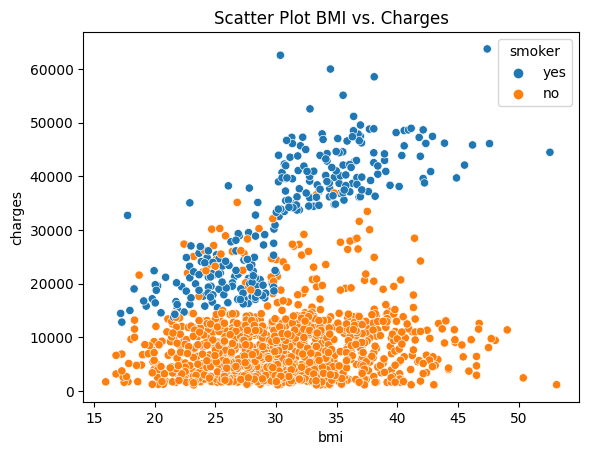

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('insurance.csv')


# Scatter plot BMI vs. Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Scatter Plot BMI vs. Charges')
plt.show()


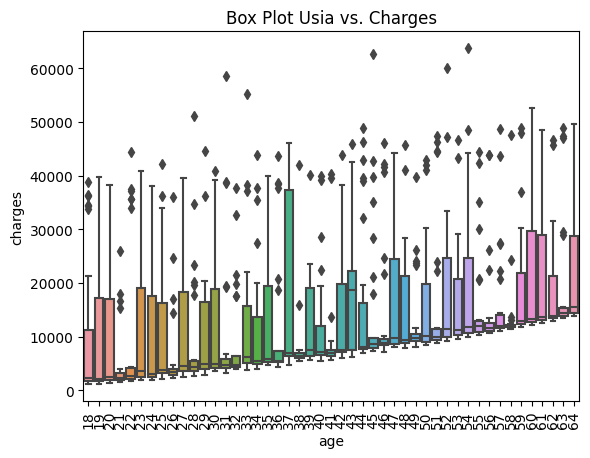

In [11]:
# Box plot Usia vs. Charges
sns.boxplot(data=df, x='age', y='charges')
plt.title('Box Plot Usia vs. Charges')
plt.xticks(rotation=90)
plt.show()


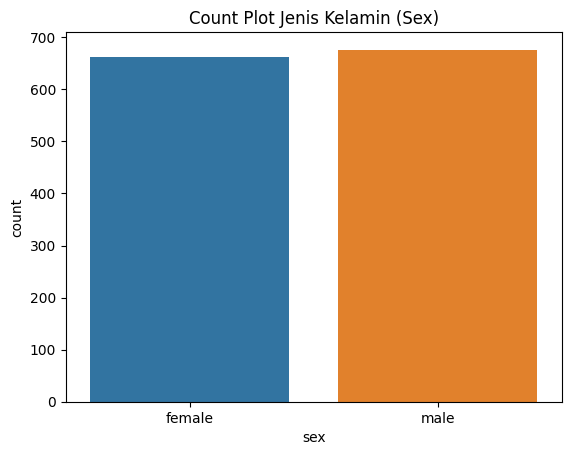

In [12]:
# Count plot Jenis Kelamin (Sex)
sns.countplot(data=df, x='sex')
plt.title('Count Plot Jenis Kelamin (Sex)')
plt.show()


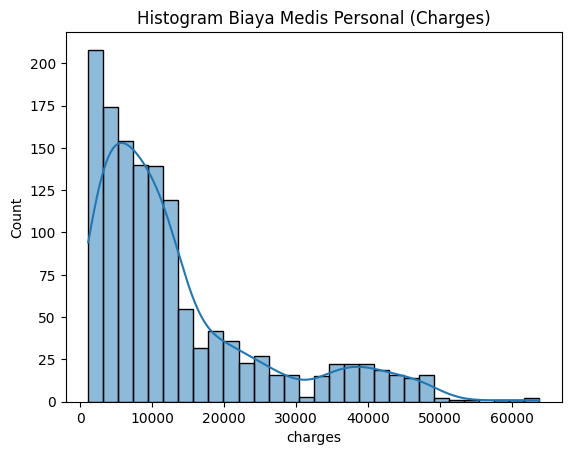

In [13]:
# Histogram Biaya Medis Personal (Charges)
sns.histplot(data=df, x='charges', bins=30, kde=True)
plt.title('Histogram Biaya Medis Personal (Charges)')
plt.show()


In [14]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('insurance.csv')

# Identifikasi variabel bebas (fitur)
# Dalam contoh ini, kita akan menganggap variabel berikut sebagai fitur:
# Usia (age), Jenis Kelamin (sex), BMI (bmi), Anak-anak (children), Merokok (smoker), Wilayah (region)
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Identifikasi variabel target (biaya medis personal)
# Dalam contoh ini, variabel biaya medis personal (charges) akan menjadi variabel target
target = df['charges']

# Menampilkan beberapa baris pertama dari data
print(features.head())
print(target.head())


   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih (train) dan data uji (test)
# Proporsi yang umum adalah 80% data latih dan 20% data uji, tetapi Anda dapat mengubahnya sesuai kebutuhan
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# Menampilkan ukuran dari masing-masing set data
print("Jumlah data latih:", len(train_features))
print("Jumlah data uji:", len(test_features))


Jumlah data latih: 1070
Jumlah data uji: 268


- train_test_split digunakan untuk membagi data menjadi dua bagian, yaitu data latih dan data uji.

- random_state digunakan untuk mengatur random seed agar pembagian data selalu konsisten setiap kali Anda menjalankan kode ini.

- Setelah pembagian selesai, Anda memiliki empat variabel: train_features, test_features, train_target, dan test_target, yang berisi data latih dan data uji untuk fitur dan target masing-masing.

In [16]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('insurance.csv')

# Melihat statistik deskriptif dari dataset
print(df.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


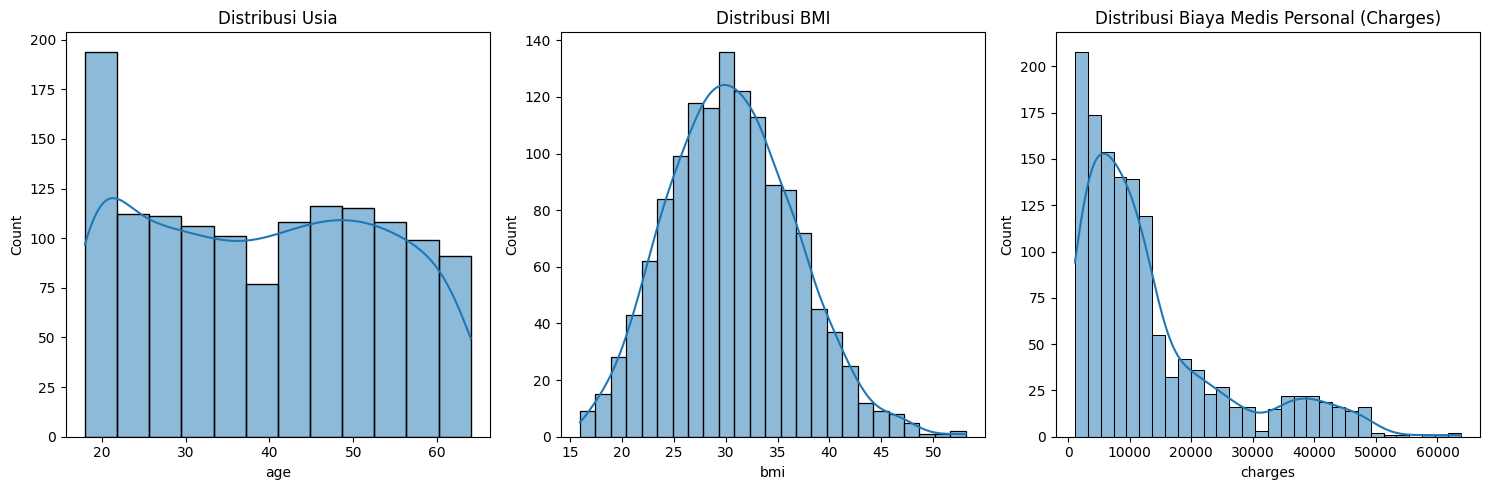

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv('insurance.csv')

# Memvisualisasikan distribusi data untuk fitur 'age', 'bmi', dan 'charges'
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Usia')

plt.subplot(132)
sns.histplot(df['bmi'], kde=True)
plt.title('Distribusi BMI')

plt.subplot(133)
sns.histplot(df['charges'], kde=True)
plt.title('Distribusi Biaya Medis Personal (Charges)')

plt.tight_layout()
plt.show()


Dari visualisasi tersebut dapat disimpulkan :

- 'Age' (Usia) tampaknya sudah dalam skala yang wajar dan tidak perlu dilakukan scaling.

- 'BMI' juga tidak memiliki perbedaan skala yang signifikan dan tidak memerlukan scaling.

- 'Charges' (Biaya Medis Personal) memiliki perbedaan skala yang signifikan dan dapat mendapatkan manfaat dari scaling.
Namun, penting untuk diingat bahwa keputusan untuk melakukan scaling juga tergantung pada jenis model yang akan Anda gunakan.

- Jadi, dalam kasus ini, fitur 'Charges' adalah kandidat yang paling mungkin memerlukan scaling, sedangkan fitur 'Age' dan 'BMI' mungkin tidak memerlukan scaling.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membaca dataset
df = pd.read_csv('insurance.csv')

# Memisahkan variabel bebas (fitur) dan variabel target
X = df[['age', 'bmi', 'children']]
y = df['charges']

# Memisahkan data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear berganda
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 131201335.64669803
R-squared (R2): 0.15489592484270776


Data dibaca dari dataset insurance.csv.

- Variabel bebas (fitur) 'age', 'bmi', dan 'children' dan variabel target 'charges' dipisahkan.

- Data dibagi menjadi data latih dan data uji menggunakan train_test_split.

- Model regresi linear berganda (LinearRegression) dibuat dan dilatih dengan data latih.

- Model digunakan untuk membuat prediksi pada data uji.

- Kinerja model diukur menggunakan Mean Squared Error (MSE) dan R-squared (R2), yang mencerminkan sejauh mana model dapat memprediksi variabel target dengan baik.

In [19]:
# Melatih model pada data latih
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan beberapa hasil prediksi
for i in range(5):
    print(f"Data ke-{i+1}: Prediksi = {y_pred[i]:.2f}, Aktual = {y_test.iloc[i]:.2f}")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Data ke-1: Prediksi = 13305.29, Aktual = 9095.07
Data ke-2: Prediksi = 11801.95, Aktual = 5272.18
Data ke-3: Prediksi = 16941.71, Aktual = 29330.98
Data ke-4: Prediksi = 14278.42, Aktual = 9301.89
Data ke-5: Prediksi = 8680.25, Aktual = 33750.29

Evaluasi Model:
Mean Squared Error (MSE): 131201335.64669803
R-squared (R2): 0.15489592484270776


- Model regresi linear berganda (LinearRegression) telah dibuat dan dilatih menggunakan data latih (X_train dan y_train).


- Kemudian, model digunakan untuk melakukan prediksi pada data uji (X_test), dan hasil prediksi disimpan dalam variabel y_pred.


- Selanjutnya, kita menampilkan beberapa hasil prediksi dan membandingkannya dengan nilai aktual dari data uji.


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Evaluasi Model:
R-squared (R2): 0.15489592484270776
Mean Squared Error (MSE): 131201335.64669803
Mean Absolute Error (MAE): 9181.311632897381


Berikut adalah deskripsi singkat tentang variabel-variabel yang relevan dalam dataset ini:

1. **age (Usia)**: Variabel ini mengindikasikan usia dari setiap individu yang dicatat dalam tahun. Ini adalah variabel numerik yang menggambarkan usia peserta asuransi.

2. **sex (Jenis Kelamin)**: Variabel ini menunjukkan jenis kelamin dari individu (pria atau wanita). Ini adalah variabel kategori.

3. **bmi (Indeks Massa Tubuh)**: Variabel ini adalah Indeks Massa Tubuh (BMI) dari individu. BMI mengukur hubungan antara berat badan dan tinggi badan, dan digunakan untuk menggambarkan status berat badan seseorang. Ini adalah variabel numerik.

4. **children (Jumlah Anak)**: Variabel ini mencatat jumlah anak atau tanggungan yang dimiliki oleh individu yang dicatat. Ini adalah variabel numerik.

5. **smoker (Merokok)**: Variabel ini mengindikasikan apakah individu adalah perokok atau bukan (yes atau no). Ini adalah variabel kategori.

6. **region (Wilayah)**: Variabel ini mencatat wilayah geografis tempat individu tinggal atau diasuransikan. Ini adalah variabel kategori.

7. **charges (Biaya Medis Personal)**: Ini adalah variabel target dalam dataset. Variabel ini mencatat biaya medis pribadi yang ditanggungkan oleh individu. Ini adalah variabel numerik yang menjadi fokus dalam pemodelan.
